<a href="https://colab.research.google.com/github/rokzeezee/PortfolioProjectss/blob/main/diabetes_Check_Using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
import keras
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [3]:
df= pd.read_csv("/content/diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
len(df[df["Outcome"]==1]) , len(df[df["Outcome"]==0])

(268, 500)

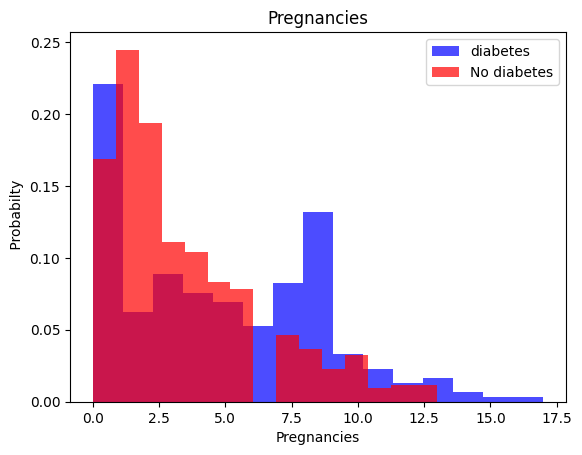

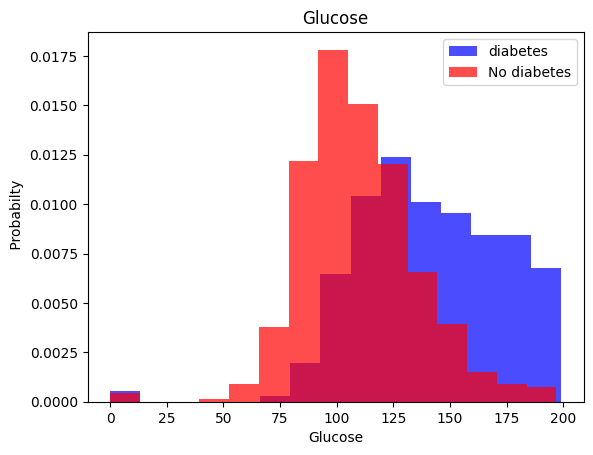

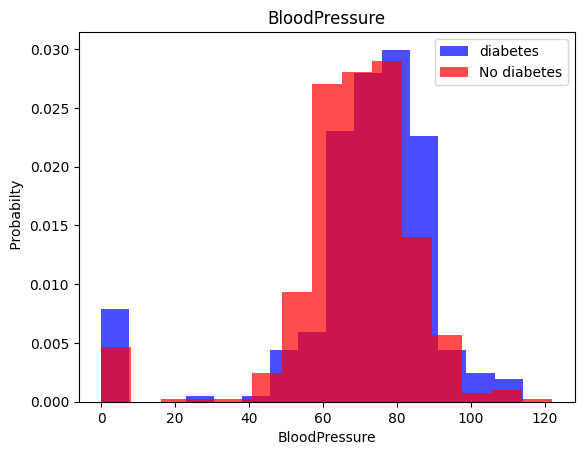

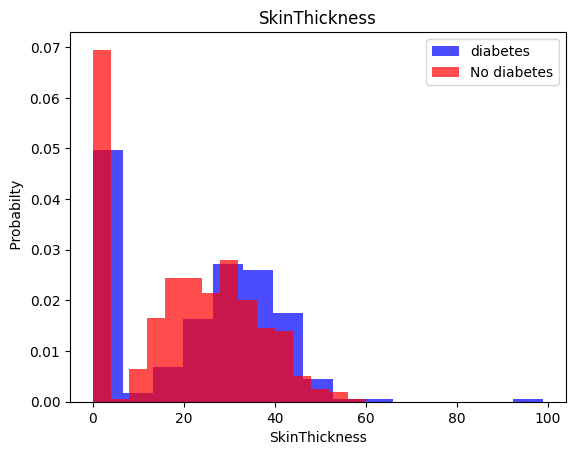

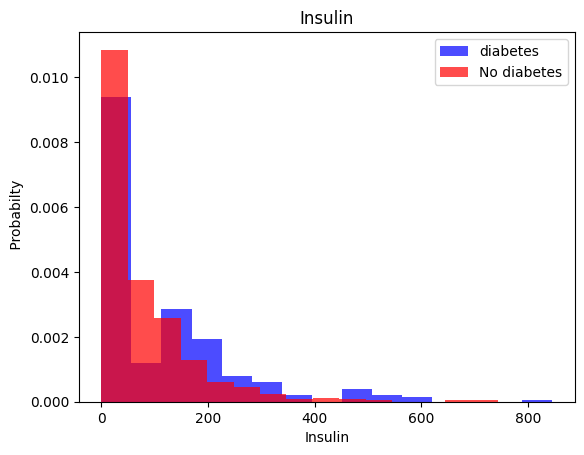

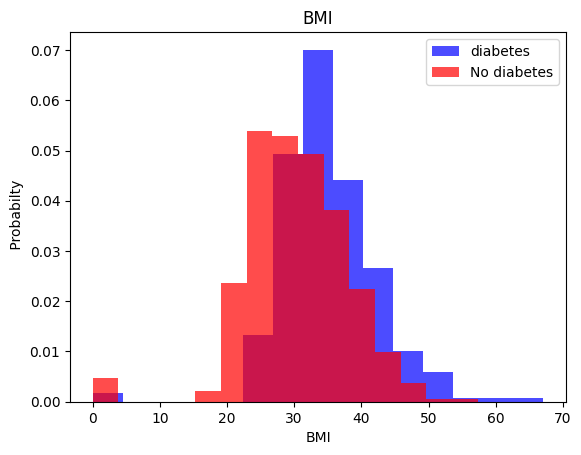

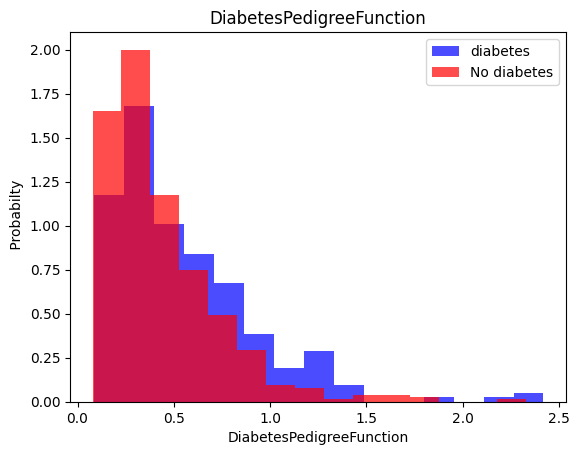

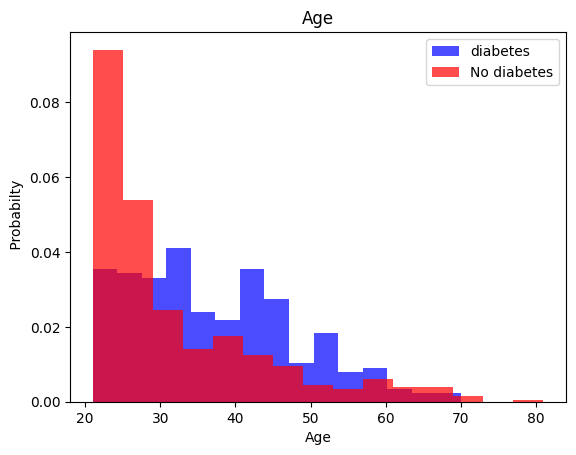

In [7]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df["Outcome"]==1][label] , color = "blue" ,label = "diabetes" , alpha = 0.7 , density=True , bins = 15)
  plt.hist(df[df["Outcome"]==0][label] , color = "red" , label = "No diabetes" , alpha = 0.7 , density = True ,bins = 15)
  plt.title(label)
  plt.ylabel(" Probabilty")
  plt.xlabel(label)
  plt.legend()
  plt.show()  
  

In [23]:
 x = df[df.columns[:-1]].values
 y = df[df.columns[-1]].values

In [26]:
x.shape, y.shape

((768, 8), (768,))

In [32]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
data = np.hstack((x,np.reshape(y ,(-1,1))))
transformed_df = pd.DataFrame(data, columns = df.columns)

In [25]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

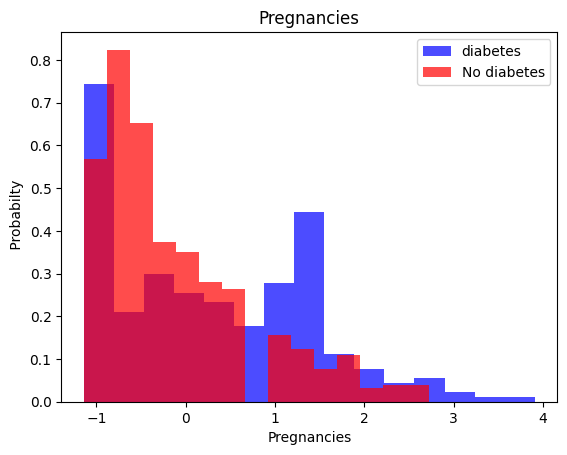

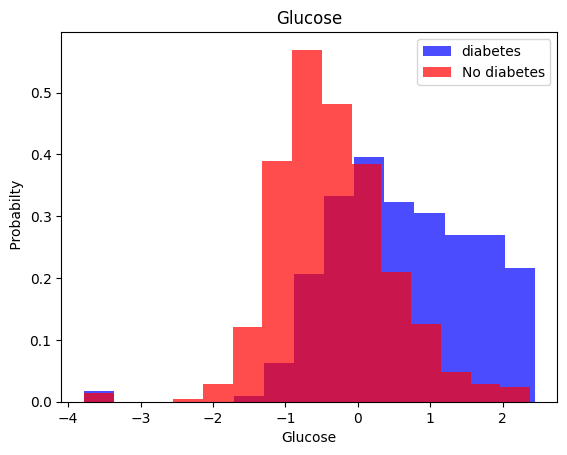

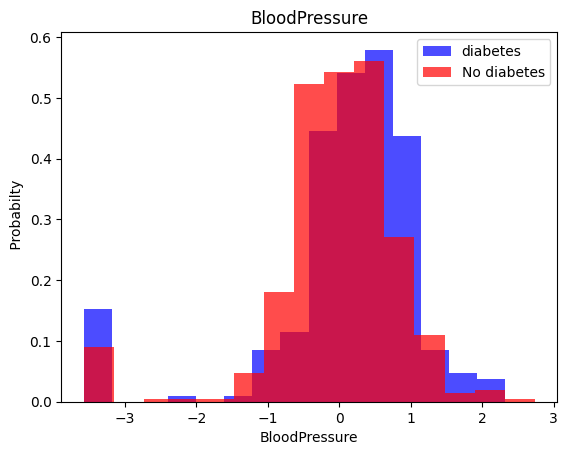

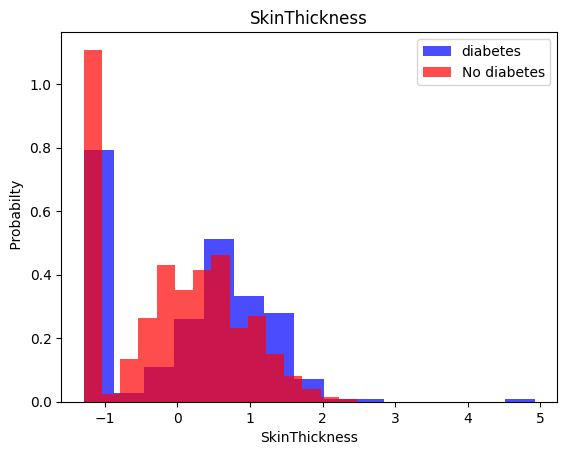

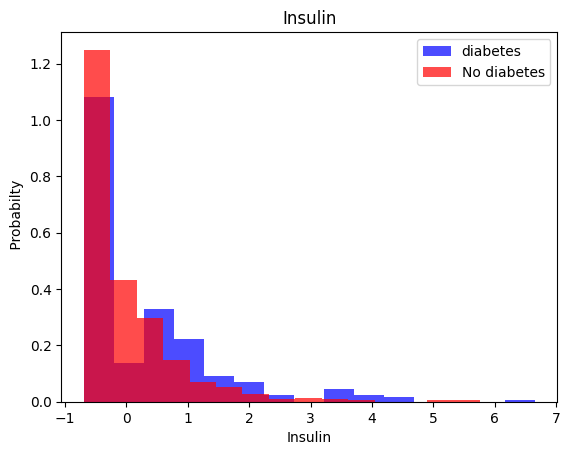

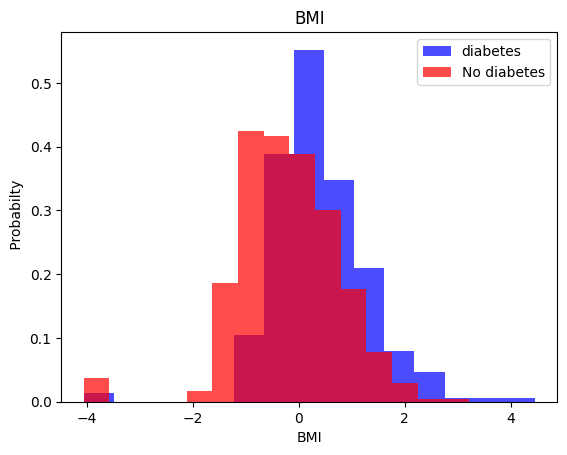

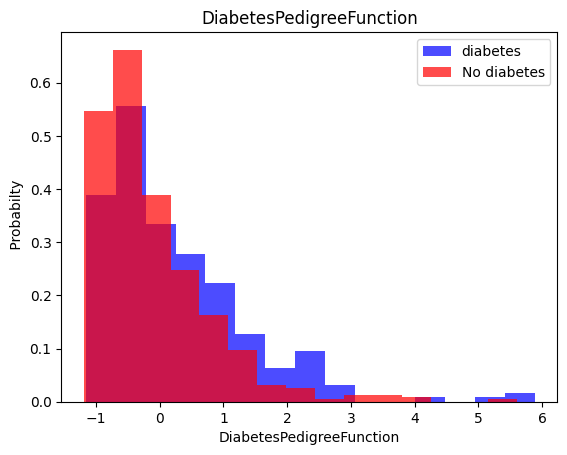

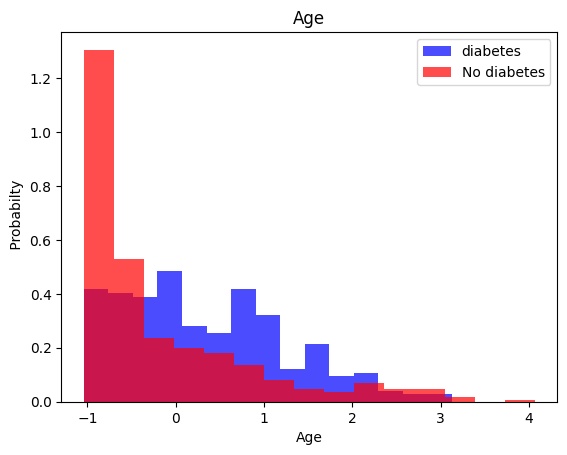

In [33]:
for i in range(len(df.columns[:-1])):
  label = transformed_df.columns[i]
  plt.hist(transformed_df[transformed_df["Outcome"]==1][label] , color = "blue" ,label = "diabetes" , alpha = 0.7 , density=True , bins = 15)
  plt.hist(transformed_df[transformed_df["Outcome"]==0][label] , color = "red" , label = "No diabetes" , alpha = 0.7 , density = True ,bins = 15)
  plt.title(label)
  plt.ylabel(" Probabilty")
  plt.xlabel(label)
  plt.legend()
  plt.show()  
  

In [39]:
over = RandomOverSampler()
x,y = over.fit_resample(x,y)
data = np.hstack((x,np.reshape(y ,(-1,1))))
transformed_df = pd.DataFrame(data, columns = df.columns)

In [40]:
len(transformed_df[transformed_df["Outcome"]==1]) ,len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

In [43]:
x_train,x_temp,y_train,y_temp = train_test_split(x ,y ,test_size= 0.4 ,random_state = 0)
x_valid,x_test,y_valid,y_test = train_test_split(x_temp ,y_temp ,test_size= 0.5 ,random_state = 0)

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                288       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,465
Trainable params: 2,465
Non-trainable params: 0
_________________________________________________________________


In [44]:
model =tf.keras.Sequential()
model.add(Dense(units = 32 , activation = "relu" , ))
model.add(Dense(units=64, activation = "relu" ))
model.add(Dense(units=1 , activation = "sigmoid" ))

In [45]:
model.compile(loss = "binary_crossentropy"  , metrics = ["accuracy"] , optimizer= 'Adam' )

In [46]:
model.evaluate(x_train,y_train)

19/19 [==============================] - 0s 3ms/step - loss: 0.7074 - accuracy: 0.4900


[0.7073723673820496, 0.49000000953674316]

In [47]:
model.evaluate(x_valid,y_valid)

7/7 [==============================] - 0s 2ms/step - loss: 0.7051 - accuracy: 0.5200


[0.7050990462303162, 0.5199999809265137]

In [56]:
import datetime, os
import tensorflow as tf
logdir = os.path.join('log',
                      datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [51]:
history = model.fit(x_train , y_train , batch_size = 32 ,verbose = 1 , validation_data= (x_valid,y_valid)  , epochs= 20  )

Epoch 1/20
19/19 [==============================] - 0s 10ms/step - loss: 0.4381 - accuracy: 0.7983 - val_loss: 0.4115 - val_accuracy: 0.8150
Epoch 2/20
19/19 [==============================] - 0s 7ms/step - loss: 0.4359 - accuracy: 0.7950 - val_loss: 0.4104 - val_accuracy: 0.8250
Epoch 3/20
19/19 [==============================] - 0s 6ms/step - loss: 0.4303 - accuracy: 0.8100 - val_loss: 0.4098 - val_accuracy: 0.8200
Epoch 4/20
19/19 [==============================] - 0s 5ms/step - loss: 0.4282 - accuracy: 0.8100 - val_loss: 0.4057 - val_accuracy: 0.8300
Epoch 5/20
19/19 [==============================] - 0s 5ms/step - loss: 0.4244 - accuracy: 0.8017 - val_loss: 0.4089 - val_accuracy: 0.8200
Epoch 6/20
19/19 [==============================] - 0s 5ms/step - loss: 0.4225 - accuracy: 0.8167 - val_loss: 0.4035 - val_accuracy: 0.8300
Epoch 7/20
19/19 [==============================] - 0s 4ms/step - loss: 0.4181 - accuracy: 0.8133 - val_loss: 0.4029 - val_accuracy: 0.8200
Epoch 8/20
19/19 [=

In [ ]:
%load_ext tensorboard
%tensorboard --logdir log 

In [49]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.4829 - accuracy: 0.7750


[0.48294222354888916, 0.7749999761581421]

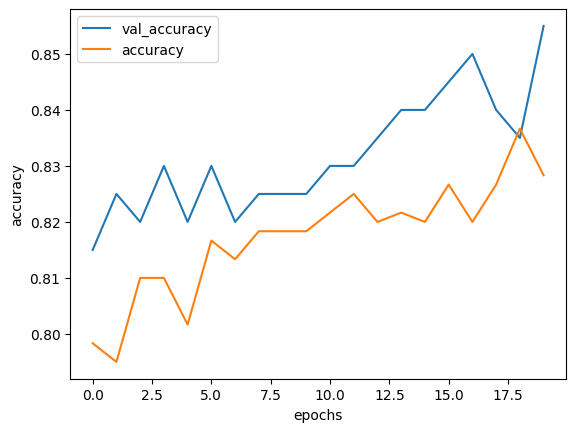

In [52]:
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

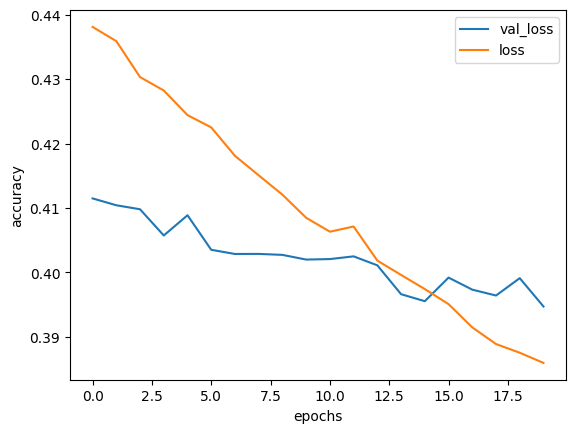

In [53]:
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [54]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_valid)
cf
    

array([[51, 46],
       [56, 47]])

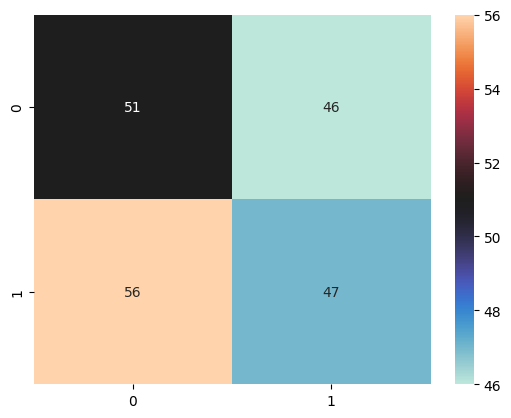

In [55]:
import seaborn as sns
sns.heatmap(cf, cmap='icefire', annot=True, fmt='d')
plt.show()